In [1]:
import numpy as np
x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


In [2]:
from scipy import sparse
# Создаем 2D массив NumPy с единицами по главной диагонали и нулями в остальных ячейках
eye = np.eye(4)
print("массив NumPy:\n{}".format(eye))


массив NumPy:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [3]:
# Преобразовываем массив NumPy в разреженную матрицу SciPy в формате CSR
# Сохраняем лишь ненулевые элементы
sparse_matrix = sparse.csr_matrix(eye)
print("\nразреженная матрица SciPy в формате CSR:\n{}".format(sparse_matrix))



разреженная матрица SciPy в формате CSR:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


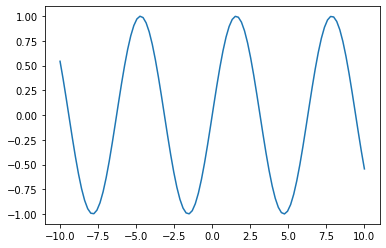

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
# Генерируем последовательность чисел от -10 до 10 с 100 шагами
x = np.linspace(-10, 10, 100)
# Создаем второй массив с помощью синуса
y = np.sin(x)
# Функция создает линейный график на основе двух массивов 
plt.plot(x, y, marker=" ")

In [5]:
import pandas as pd
# создаем простой набор данных с характеристиками пользователей
data = {'Name': ["John", "Anna", "Peter", "Linda"],
'Location' : ["New York", "Paris", "Berlin", "London"], 'Age' : [24, 13, 53, 33]
}
data_pandas = pd.DataFrame(data)
# IPython.display позволяет "красиво напечатать" датафреймы # в Jupyter notebook
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [6]:
# Выбрать все строки, в которых значение столбца age больше 30
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


In [7]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display 
plt.rc('font', family='Verdana')


/Users/romanpodoynitsyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/romanpodoynitsyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
print("версия mglearn: {}".format(mglearn.__version__))

версия mglearn: 0.1.7


In [9]:
from sklearn.datasets import load_iris 
iris_dataset = load_iris()
print("Ключи iris_dataset: \n{}".format(iris_dataset.keys()))


Ключи iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [10]:
print("Названия ответов: {}".format(iris_dataset['target_names']))

Названия ответов: ['setosa' 'versicolor' 'virginica']


In [11]:
print("Форма массива data: {}".format(iris_dataset['data'].shape))

Форма массива data: (150, 4)


In [12]:
print("Первые пять строк массива data:\n{}".format(iris_dataset['data'][:5]))

Первые пять строк массива data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [13]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [14]:
len(X_train)

112

In [15]:
len(X_test)

38

In [16]:
X_train.shape

(112, 4)

In [17]:
type(X_train)

numpy.ndarray

In [18]:
type(iris_dataset)

sklearn.utils.Bunch

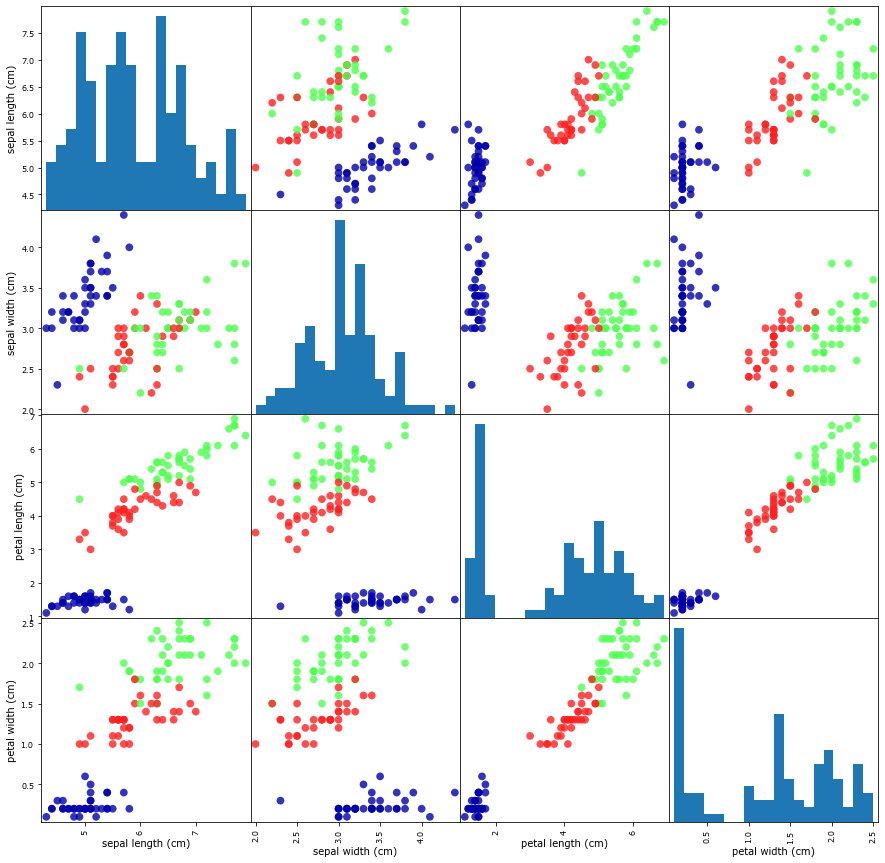

In [19]:
# создаем dataframe из данных в массиве X_train
# маркируем столбцы, используя строки в iris_dataset.feature_names 
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# создаем матрицу рассеяния из dataframe, цвет точек задаем с помощью y_train 
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [20]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [21]:
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new) 
print("Прогноз: {}".format(prediction)) 
print("Спрогнозированная метка: {}".format(
iris_dataset['target_names'][prediction]))

Прогноз: [0]
Спрогнозированная метка: ['setosa']


In [22]:
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

Правильность на тестовом наборе: 0.97


In [23]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
print("Ключи cancer(): \n{}".format(cancer.keys()))

Ключи cancer(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [24]:
cancer['data'].shape

(569, 30)

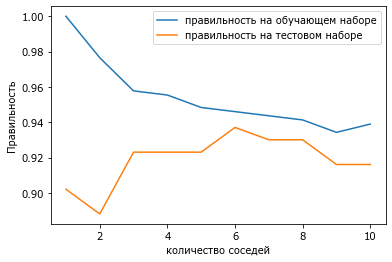

In [25]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = [] 
test_accuracy = []
# пробуем n_neighbors от 1 до 10 
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings: # строим модель
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)
    # записываем правильность на обучающем наборе 
    training_accuracy.append(clf.score(X_train, y_train)) 
    # записываем правильность на тестовом наборе 
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе") 
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе") 
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
plt.legend()

In [26]:
clf = KNeighborsClassifier(n_neighbors=7) 
clf.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.6f}".format(clf.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.6f}".format(clf.score(X_test, y_test)))

Правильность на обучающем наборе: 0.943662
Правильность на тестовом наборе: 0.930070


In [27]:
from sklearn.neighbors import KNeighborsRegressor 
X, y = mglearn.datasets.make_wave(n_samples=40)
# разбиваем набор данных wave на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# создаем экземпляр модели и устанавливаем количество соседей равным 3
reg = KNeighborsRegressor(n_neighbors=3)
# подгоняем модель с использованием обучающих данных и обучающих ответов 
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [28]:
print("Прогнозы для тестового набора:\n{}".format(reg.predict(X_test)))


Прогнозы для тестового набора:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [29]:
print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test, y_test)))

R^2 на тестовом наборе: 0.83


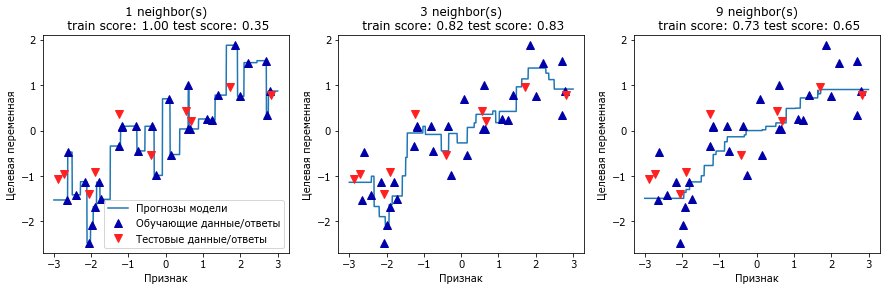

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3 
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # получаем прогнозы, используя 1, 3, и 9 соседей
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) 
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8) 
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test))) 
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевая переменная") 
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы",
"Тестовые данные/ответы"], loc="best")

In [31]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [32]:
print("lr.coef_: {}".format(lr.coef_)) 
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [-5.11126504e+02  4.02559787e+00 -9.45778613e+01  1.34720251e+01
  3.48176257e+01  6.03611391e+01  3.49707471e+01  2.94114542e+00
  3.14525465e+00  8.20792132e+01  1.24254396e+01  3.86676075e+01
 -9.38409521e-01  1.32936334e+01  7.60317098e+02  1.42274855e+03
  2.29220565e+02 -7.79405429e+01  8.79429261e+01  1.39813973e+01
  1.02565346e+02  7.52178879e+02 -1.82071934e+03  5.34143172e+02
 -2.41122305e+01  1.11848898e+02 -4.38177813e+00 -1.23079894e+01
 -3.63360790e+00 -5.64878037e+01  4.60395879e-01  8.18005986e+00
 -2.06294404e+01 -3.49659791e+01  4.31717988e+01 -2.92220843e+00
  1.45250942e+01 -3.24346333e+01  3.66984591e+01 -2.75859278e+00
  6.27805740e+00  4.98379104e+01  6.55060318e+00  3.91047481e+01
 -1.14826290e+01 -8.00990322e-01 -3.68662287e+00  3.36483260e+01
 -1.49103502e+01  1.34720251e+01 -1.80244019e+01 -2.90956806e+01
 -2.78115796e+00 -1.10315060e+01  1.15584830e+00 -8.37313259e-01
 -7.89905136e+00  6.27950290e+00 -1.09538327e+01 -2.48389637e+01
 -1.16316264e+0

In [33]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.94
Правильность на тестовом наборе: 0.78


In [34]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

Правильность на обучающем наборе: 0.87
Правильность на тестовом наборе: 0.81


In [35]:
ridge10 = Ridge(alpha=0.3).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))


Правильность на обучающем наборе: 0.90
Правильность на тестовом наборе: 0.83


In [36]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train))) 
print("Правильность на контрольном наборе: {:.2f}".format(lasso.score(X_test, y_test))) 
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))


Правильность на обучающем наборе: 0.93
Правильность на контрольном наборе: 0.82
Количество использованных признаков: 73


/Users/romanpodoynitsyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/Users/romanpodoynitsyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/romanpodoynitsyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


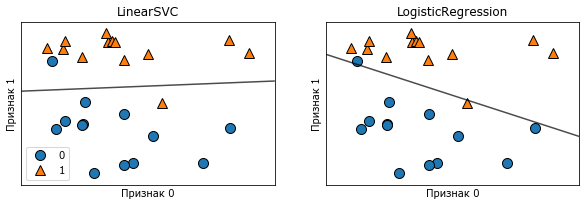

In [37]:
from sklearn.linear_model import LogisticRegression 
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(C=1), LogisticRegression(C=1000)], axes): 
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__)) 
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
axes[0].legend()

In [38]:
# only L2 C=1000
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(C=1000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.5f}".format(logreg.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.5f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.98122
Правильность на тестовом наборе: 0.97203


/Users/romanpodoynitsyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
#L2+L1 C=100,penalty="l1"
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(C=100,penalty="l1").fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.5f}".format(logreg.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.5f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.98592
Правильность на тестовом наборе: 0.97902


/Users/romanpodoynitsyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/Users/romanpodoynitsyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/romanpodoynitsyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/romanpodoynitsyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


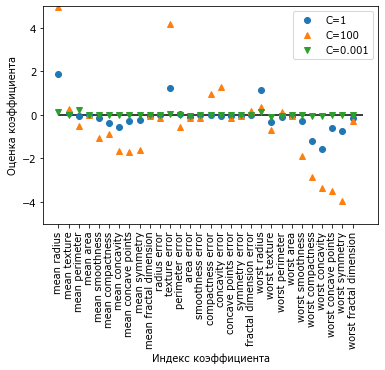

In [40]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
logreg = LogisticRegression().fit(X_train, y_train)

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100") 
plt.plot(logreg001.coef_.T, 'v', label="C=0.001") 
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90) 
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5) 
plt.xlabel("Индекс коэффициента") 
plt.ylabel("Оценка коэффициента") 
plt.legend()

In [41]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.937


In [42]:
tree.tree_.max_depth

7

In [43]:
tree.tree_.node_count

35

In [44]:
# maximum size of tree train score=1!!!!

In [45]:
# max_depth=4
tree = DecisionTreeClassifier(max_depth=4, random_state=0) 
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.951


In [46]:
tree.tree_.max_depth

4

In [47]:
tree.tree_.node_count

21

In [48]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

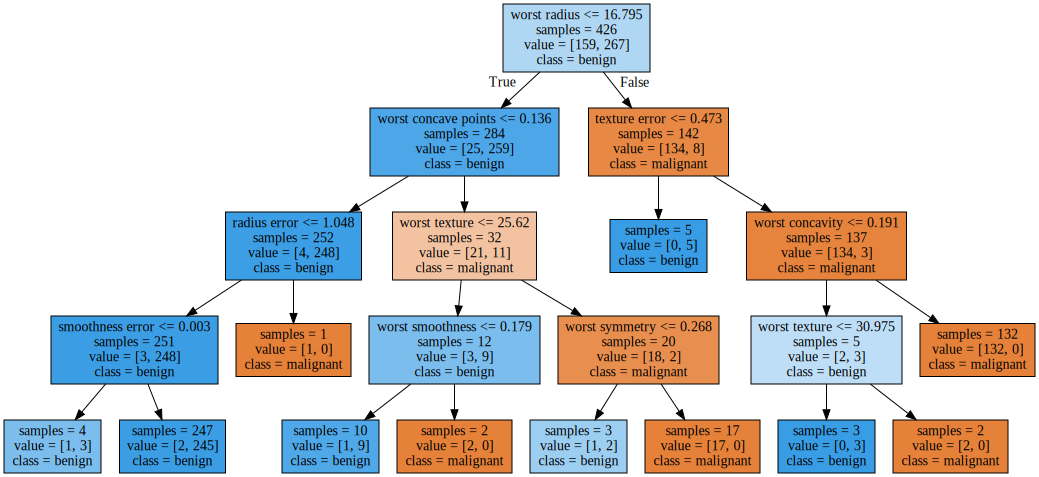

In [49]:
import graphviz
with open('tree.dot') as f: 
    dot_graph = f.read()
graphviz.Source(dot_graph)


In [50]:
for name, score in zip(cancer["feature_names"], tree.feature_importances_): 
    print(name, score)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.010197368202069328
texture error 0.0483982536186494
perimeter error 0.0
area error 0.0
smoothness error 0.002415595085315826
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.7268285094603201
worst texture 0.045815897088866304
worst perimeter 0.0
worst area 0.0
worst smoothness 0.014157702104714051
worst compactness 0.0
worst concavity 0.0181879968644502
worst concave points 0.12211319926548449
worst symmetry 0.01188547831013032
worst fractal dimension 0.0


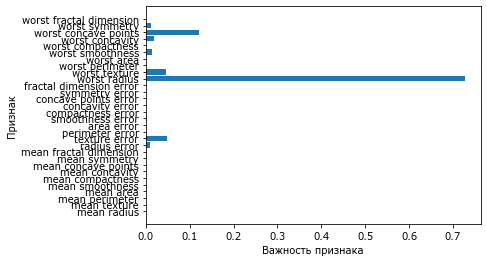

In [51]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), cancer.feature_names) 
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plot_feature_importances_cancer(tree)

In [52]:
cancer['feature_names'].shape
sqrt(30)

NameError: name 'sqrt' is not defined

In [53]:
from sklearn.ensemble import RandomForestClassifier
from math import sqrt

from timeit import default_timer as timer




X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=0)


start = timer()

forest = RandomForestClassifier(n_estimators=1000,random_state=0, n_jobs=-1,max_depth=100, max_features=5 )
forest.fit(X_train, y_train)


print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

end = timer()
print(end - start)


Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.972
1.5056180359970313


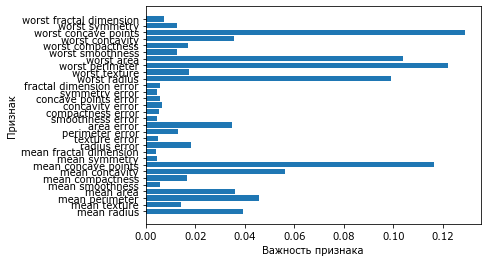

In [54]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), cancer.feature_names) 
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plot_feature_importances_cancer(forest)

In [55]:
from sklearn.ensemble import GradientBoostingClassifier 
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0) 

start = timer()
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1,learning_rate=0.9,n_estimators=100)
gbrt.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.6f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.6f}".format(gbrt.score(X_test, y_test)))
end = timer()
print(end - start)

Правильность на обучающем наборе: 1.000000
Правильность на тестовом наборе: 0.986014
0.0537723480083514


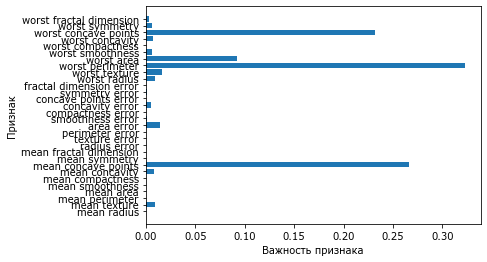

In [56]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1) 
gbrt.fit(X_train, y_train)
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), cancer.feature_names) 
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plot_feature_importances_cancer(gbrt)

In [110]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=0)
svc = SVC(C=100) 
svc.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(svc.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(svc.score(X_test, y_test)))


Правильность на обучающем наборе: 1.00
Правильность на тестовом наборе: 0.63


/Users/romanpodoynitsyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [111]:
from sklearn.preprocessing import MinMaxScaler
# предварительная обработка с помощью шкалирования 0-1
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# построение SVM на масштабированных обучающих данных 
svc.fit(X_train_scaled, y_train)
# оценка правильности для масштабированного тестового набора 
print("Правильность на масштабированном тестовом наборе: {:.2f}".format(
svc.score(X_test_scaled, y_test)))

Правильность на масштабированном тестовом наборе: 0.97


/Users/romanpodoynitsyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [112]:
# предварительная обработка с помощью масштабирования 
# нулевым средним и единичной дисперсией
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)
# построение SVM на масштабированных обучающих данных 
svc.fit(X_train_scaled, y_train)
# оценка правильности для масштабированного тестового набора
print("Правильность SVM на тестовом наборе: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Правильность SVM на тестовом наборе: 0.96


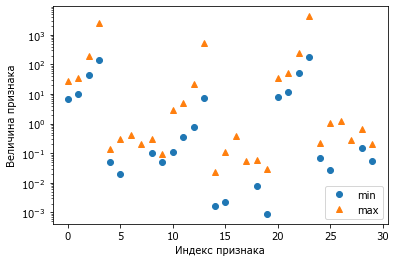

In [58]:
#посмотрим на минимальное и максимальное значения каждого признака в log-пространстве 

plt.plot(X_train.min(axis=0), 'o', label="min") 
plt.plot(X_train.max(axis=0), '^', label="max") 
plt.legend(loc=4)
plt.xlabel("Индекс признака") 
plt.ylabel("Величина признака") 
plt.yscale("log")

In [59]:
#  масштабирование всех признаков вручную (MinMaxScaler -  см ниже)

# вычисляем минимальное значение для каждого признака обучающего набора
min_on_training = X_train.min(axis=0)
# вычисляем ширину диапазона для каждого признака (max - min) обучающего набора 
range_on_training = (X_train - min_on_training).max(axis=0)
# вычитаем минимальное значение и затем делим на ширину диапазона
# min=0 и max=1 для каждого признака
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Минимальное значение для каждого признака\n{}".format(X_train_scaled.min(axis=0))) 
print("Максимальное значение для каждого признака\n {}".format(X_train_scaled.max(axis=0)))


Минимальное значение для каждого признака
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Максимальное значение для каждого признака
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [60]:
# используем ТО ЖЕ САМОЕ преобразование для тестового набора,
# используя минимум и ширину диапазона из обучающего набора (см. главу 3) 
X_test_scaled = (X_test - min_on_training) / range_on_training

In [61]:
svc = SVC() 
svc.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format( svc.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(svc.score(X_test_scaled, y_test)))


Правильность на обучающем наборе: 0.948
Правильность на тестовом наборе: 0.951


/Users/romanpodoynitsyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [62]:
svc = SVC(C=10000, gamma=0.001) 
svc.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format( svc.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.986
Правильность на тестовом наборе: 0.972


In [63]:
y_pred=svc.predict(X_train_scaled)

In [64]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train, y_pred)
print('Accuracy from scikit-learn: {}%'.format(acc * 100))

Accuracy from scikit-learn: 98.59154929577466%


In [65]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [66]:
type(X_train_scaled)

numpy.ndarray

In [67]:
u = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [68]:
u.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

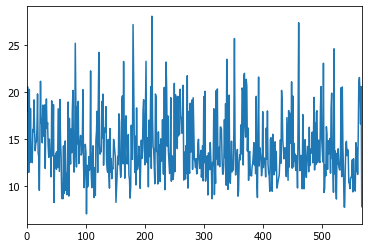

In [69]:
u['mean radius'].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3a8a1f290>,
      dtype=object)

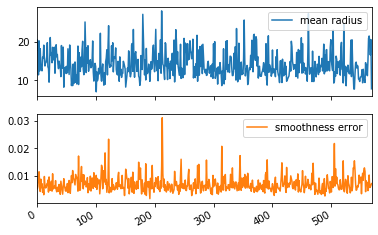

In [70]:
u[['mean radius','smoothness error']].plot(subplots=True)

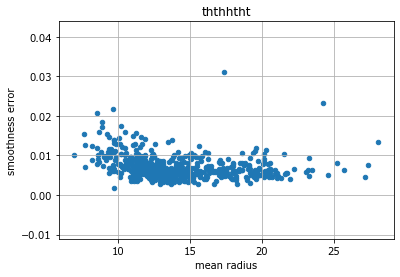

In [71]:
u.plot(x = 'mean radius', 
        y = 'smoothness error', 
        kind = 'scatter', 
        grid = True, 
        title = 'ththhtht')

(array([129., 220., 136.,  52.,  18.,   9.,   1.,   3.,   0.,   1.]),
 array([0.3602 , 0.81268, 1.26516, 1.71764, 2.17012, 2.6226 , 3.07508,
        3.52756, 3.98004, 4.43252, 4.885  ]),
 <a list of 10 Patch objects>)

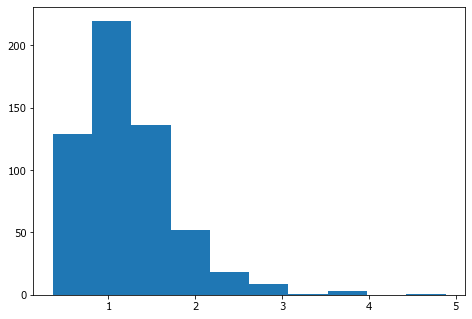

In [72]:
#обхектно -ориентированный подход к создание графика

fig = plt.figure()
fig = fig.add_axes([0, 0, 1, 1])
fig.hist(u['texture error'])

In [73]:
y_train.sum()

267

In [74]:
len(y_train)

426

(array([159.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 267.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

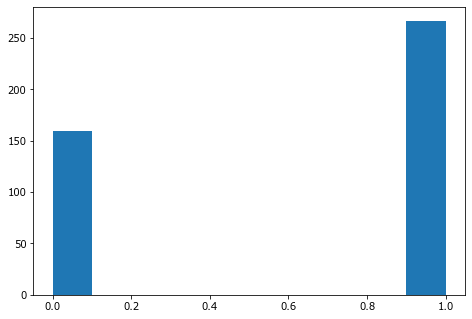

In [75]:
fig = plt.figure()
fig = fig.add_axes([0, 0, 1, 1])
fig.hist(y_train)

In [79]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split( cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42) 
mlp.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(mlp.score(X_train, y_train))) 
print("Правильности на тестовом наборе: {:.2f}".format(mlp.score(X_test, y_test)))


Правильность на обучающем наборе: 0.94
Правильности на тестовом наборе: 0.92


In [82]:
# вычисляем среднее для каждого признака обучающего набора
mean_on_train = X_train.mean(axis=0)
# вычисляем стандартное отклонение для каждого признака обучающего набора 
std_on_train = X_train.std(axis=0)
# вычитаем среднее и затем умножаем на обратную величину стандартного отклонения
# mean=0 и std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# используем ТО ЖЕ САМОЕ преобразование (используем среднее и стандартное отклонение # обучающего набора) для тестового набора
X_test_scaled = (X_test - mean_on_train) / std_on_train 
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format( mlp.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


Правильность на обучающем наборе: 0.991
Правильность на тестовом наборе: 0.965


/Users/romanpodoynitsyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [104]:
mlp = MLPClassifier(max_iter=1000,alpha=1,hidden_layer_sizes=[1000,1000], random_state=0) 
mlp.fit(X_train_scaled, y_train)
print("Правильность на обучающем наборе: {:.3f}".format( mlp.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.979


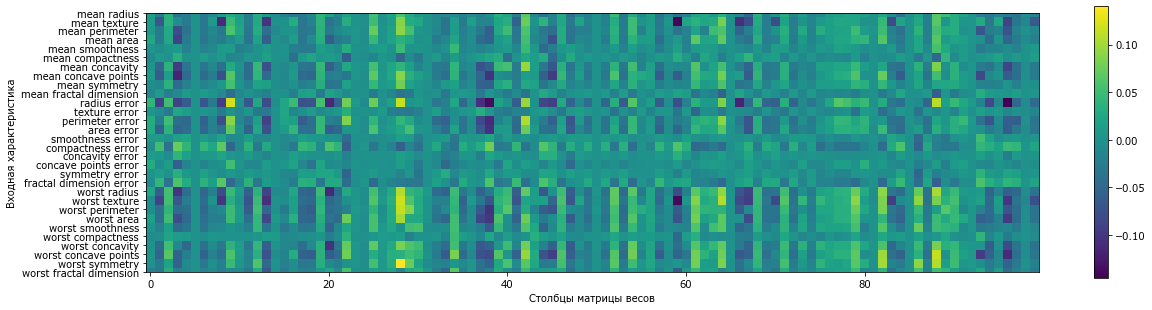

In [90]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis') 
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Столбцы матрицы весов")
plt.ylabel("Входная характеристика")
plt.colorbar()

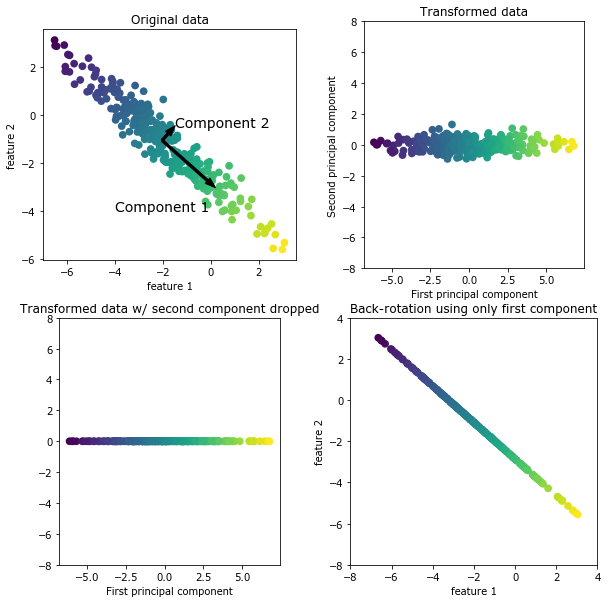

In [113]:
# PCA illustration

mglearn.plots.plot_pca_illustration()


In [ ]:
#можно воспользовать более простой визуализацией, вычислив гистограммы распределения 
#значений признаков для двух классов, доброкачественных и злокачественных опухолей

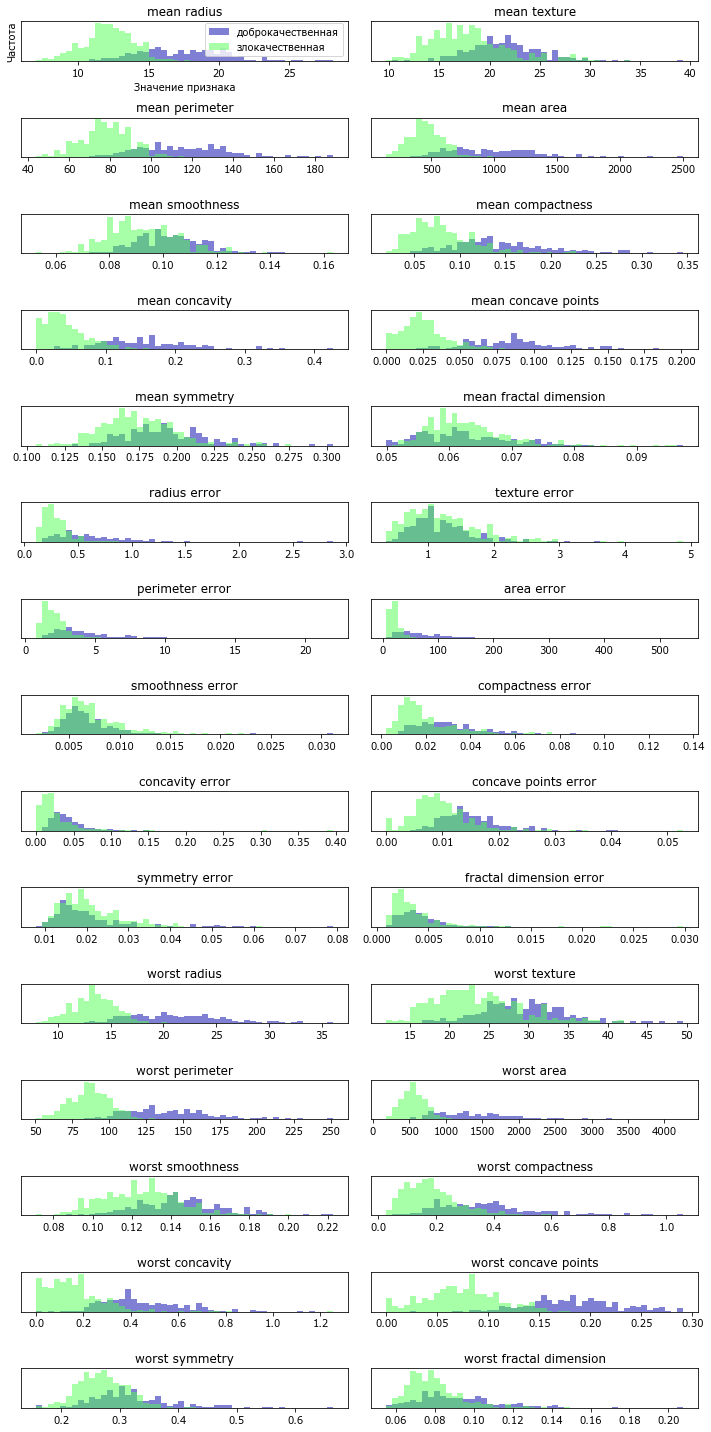

In [114]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20)) 
malignant = cancer.data[cancer.target == 0] 
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50) 
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5) 
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5) 
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Значение признака") 
ax[0].set_ylabel("Частота")
ax[0].legend(["доброкачественная", "злокачественная"], loc="best") 
fig.tight_layout()

In [ ]:
#Однако этот график не дает нам никакой информации о взаимодействии между переменными 
#и взаимосвязях между признаками и классами зависимой переменной. 
#Используя PCA, мы можем учесть главные взаимодействия и получить несколько 
#более полную картину. Мы можем найти первые две главные компоненты и визуализировать данные в 
#этом новом двумерном пространстве с помощью одной диаграммы рассеяния.

In [116]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
scaler = StandardScaler() 
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [117]:
from sklearn.decomposition import PCA
# оставляем первые две главные компоненты
pca = PCA(n_components=2)
# подгоняем модель PCA на наборе данных breast cancer 
pca.fit(X_scaled)
# преобразуем данные к первым двум главным компонентам
X_pca = pca.transform(X_scaled)
print("Форма исходного массива: {}".format(str(X_scaled.shape)))
print("Форма массива после сокращения размерности: {}".format(str(X_pca.shape)))


Форма исходного массива: (569, 30)
Форма массива после сокращения размерности: (569, 2)


In [ ]:
#количество признаков сократилось с 30 до 2!!!

Text(0, 0.5, 'Вторая главная компонента')

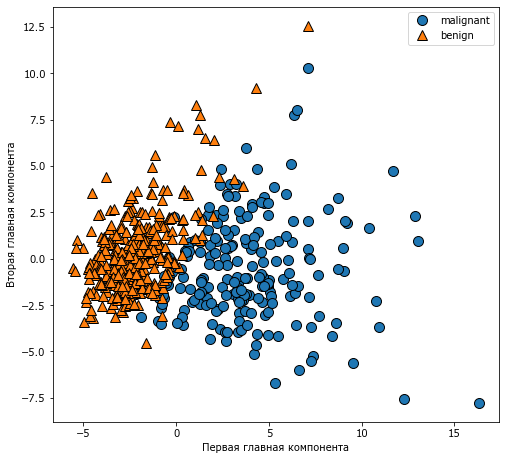

In [118]:
# строим график первых двух главных компонент, классы выделены цветом
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target) 
plt.legend(cancer.target_names, loc="best") 
plt.gca().set_aspect("equal")
plt.xlabel("Первая главная компонента")
plt.ylabel("Вторая главная компонента")

In [ ]:
#Недостаток PCA заключается в том, что эти две оси графика часто бывает сложно интерпретировать. 
#Главные компоненты соответствуют направлениям данных, поэтому они представляют собой 
#комбинации исходных признаков. Однако, как мы скоро увидим, эти комбинации обычно очень сложны.
#Сами главные компоненты могут быть сохранены в атрибуте components_ объекта PCA в ходе подгонки:

In [119]:
#Столбцы соответствуют атрибуту исходных признаков для объекта PCA в этом примере, «mean radius», «mean texture» и т.д.
#Давайте посмотрим на содержимое атрибута components_:

print("форма главных компонент: {}".format(pca.components_.shape))
print("компоненты PCA:\n{}".format(pca.components_))

форма главных компонент: (2, 30)
компоненты PCA:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Главные компоненты')

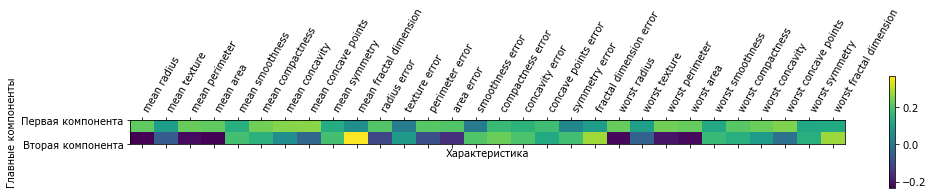

In [120]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["Первая компонента", "Вторая компонента"]) 
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left') 
plt.xlabel("Характеристика")
plt.ylabel("Главные компоненты")


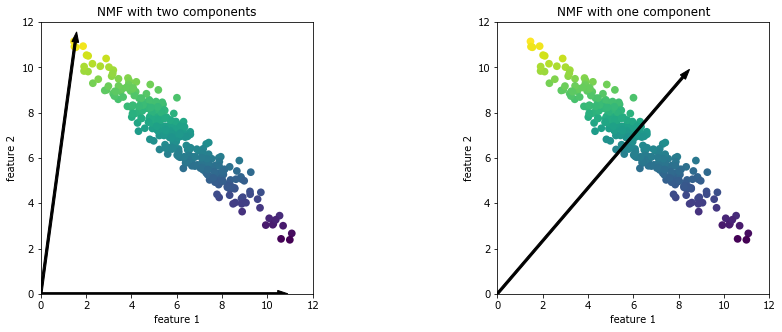

In [121]:
mglearn.plots.plot_nmf_illustration()